## Model Training

####  Models training with lr=0.001 ,epochs 20,batch_size=32 and got Test accuracy: 0.7628  (train on 42000 samples, validate on 8000 samples)

Train on 42000 samples, validate on 8000 samples
Epoch 1/20
42000/42000 [==============================] - 19s - loss: 1.5742 - acc: 0.4245 - val_loss: 1.2615 - val_acc: 0.5427
Epoch 2/20
42000/42000 [==============================] - 18s - loss: 1.2174 - acc: 0.5649 - val_loss: 1.0338 - val_acc: 0.6384
Epoch 3/20
42000/42000 [==============================] - 18s - loss: 1.0273 - acc: 0.6370 - val_loss: 0.9154 - val_acc: 0.6833
Epoch 4/20
42000/42000 [==============================] - 17s - loss: 0.9133 - acc: 0.6754 - val_loss: 0.8663 - val_acc: 0.6923
Epoch 5/20
42000/42000 [==============================] - 17s - loss: 0.8419 - acc: 0.7024 - val_loss: 0.7939 - val_acc: 0.7181
Epoch 6/20
42000/42000 [==============================] - 18s - loss: 0.7949 - acc: 0.7188 - val_loss: 0.7493 - val_acc: 0.7354
Epoch 7/20
42000/42000 [==============================] - 18s - loss: 0.7446 - acc: 0.7366 - val_loss: 0.7548 - val_acc: 0.7319
Epoch 8/20
42000/42000 [==============================]

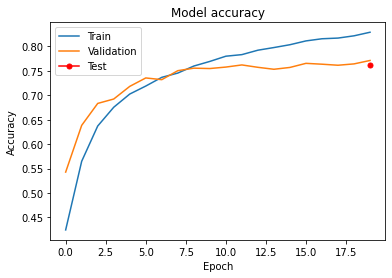

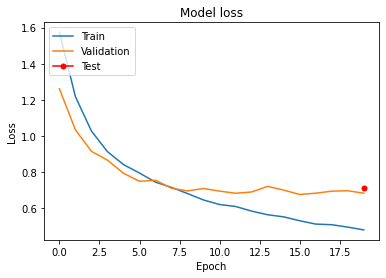

In [74]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split the training dataset into training and validation sets
x_train, x_valid = x_train[:42000], x_train[42000:]
y_train, y_valid = y_train[:42000], y_train[42000:]

x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the architecture of your CNN
model = tf.keras.models.Sequential([
    # first layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # second layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',),
    # max pooling layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    # third layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # forth layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # max pooling layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    # flattern layer
    tf.keras.layers.Flatten(),
    #dropout layer
    tf.keras.layers.Dropout(0.5),
    # fully connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # output layer
    tf.keras.layers.Dense(10,activation='softmax')
])

# Compile the model
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


# Train the model with callbacks and save the history
history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_data=(x_valid, y_valid))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot the test accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(len(history.history['acc'])-1, test_acc, marker='o', markersize=5, color="red")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()

# Plot the test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(len(history.history['loss'])-1, test_loss, marker='o', markersize=5, color="red")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()


## Architecture of CNN

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

## Saving the model

In [128]:
model.save('CNNFinal_Model.h5')

## Performing Evaluation Metrics

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Load the saved model
model = tf.keras.models.load_model('CNNFinal_Model.h5')

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.38      0.87      0.53      1000
           1       0.43      0.94      0.59      1000
           2       0.72      0.27      0.39      1000
           3       0.51      0.18      0.26      1000
           4       0.85      0.09      0.16      1000
           5       0.57      0.52      0.54      1000
           6       0.90      0.17      0.28      1000
           7       0.48      0.70      0.57      1000
           8       0.66      0.51      0.57      1000
           9       0.53      0.70      0.60      1000

    accuracy                           0.49     10000
   macro avg       0.60      0.49      0.45     10000
weighted avg       0.60      0.49      0.45     10000



## Predicting the results with our own images

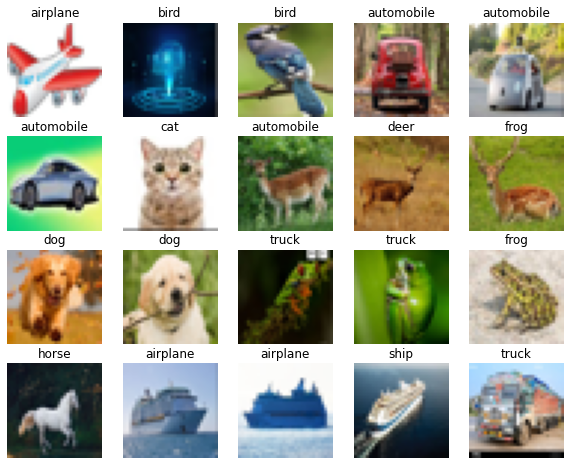

In [13]:
import os
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('CNNFinal_Model.h5')

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Set the path to the directory containing the images
image_dir = 'Images/'

# Define the number of rows and columns for the grid
rows = 4
cols = 5

# Create a figure object and set its size
fig, ax = plt.subplots(rows, cols, figsize=(10, 8))

# Loop through all image files in the directory
counter = 0
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png') or filename.endswith('.JPG'):
        
        
        # Print the filename for debugging purposes
        img_path = os.path.join(image_dir, filename)            
        img = image.load_img(img_path, target_size=(32, 32))   ## Loading image with size 32*32
        img_array = image.img_to_array(img)                    ## Converting image to array
        img_array = np.expand_dims(img_array, axis=0)          ## Expanding the dimensions

        # Predict the class of the image
        result = model.predict(img_array)
        class_index = np.argmax(result)                        ## Extracting the maximum value
        predicted_class_name = class_names[class_index]

        # Plot the image and its predicted class
        row = counter // cols
        col = counter % cols
        ax[row, col].imshow(img)
        ax[row, col].set_title(predicted_class_name)
        ax[row, col].axis('off')
        counter += 1
        
# Show the grid of images
plt.show()


## Predicting on Test Images

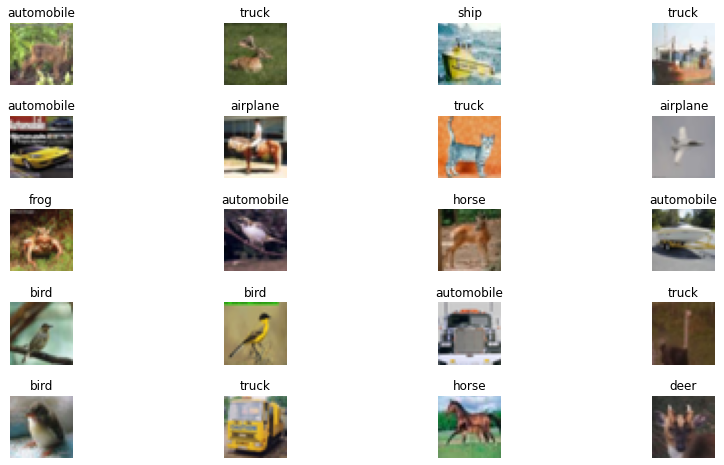

In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the number of rows and columns in the grid
rows = 5
cols = 4

# Create a new figure for the grid
fig, ax = plt.subplots(rows, cols, figsize=(15,8))

# Loop through a subset of the images
for i in range(rows*cols):
    img = x_test[i+2500]
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    result = model.predict(img_array)
    class_index = np.argmax(result)
    predicted_class_name = class_names[class_index]

    # Plot the image and its predicted class
    row = i // cols
    col = i % cols
    ax[row, col].imshow(img)
    ax[row, col].set_title(predicted_class_name)
    ax[row, col].axis('off')

# Show the grid of images
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()
